In [ ]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [1]:
!pip install vaderSentiment

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 16})

In [3]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_Instagram-comments3.csv')[['Lemmatized_Comments']]

In [4]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Function to analyze sentiment
def analyze_sentiment(Lemmatized_Comments):
    # Get sentiment scores
    scores = analyzer.polarity_scores(Lemmatized_Comments)
    return scores

# Apply sentiment analysis to each comment
df['vader_sentiment'] = df['Lemmatized_Comments'].apply(analyze_sentiment)

In [5]:
# Extract specific sentiment scores
df['compound'] = df['vader_sentiment'].apply(lambda x: float(x['compound'])) # Overall sentiment score # Convert to float
df['pos'] = df['vader_sentiment'].apply(lambda x: x['pos'])  # Positive sentiment score
df['neg'] = df['vader_sentiment'].apply(lambda x: x['neg'])  # Negative sentiment score
df['neu'] = df['vader_sentiment'].apply(lambda x: x['neu'])  # Neutral sentiment score

In [6]:
print(df[['Lemmatized_Comments', 'vader_sentiment']])

                          Lemmatized_Comments  \
0    look nourish perfect keep lips soft cool   
1                                      pretty   
2                                 labour love   
3                                         wow   
4                             oh soooo pretty   
..                                        ...   
411                            all best brand   
412                            right ? ? love   
413                                     woooo   
414                       julep gluten free ?   
415         leapingbunnycertified crueltyfree   

                                       vader_sentiment  
0    {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...  
1    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  
2    {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  
3    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  
4    {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...  
..                                                 ...  
411  {'neg':

In [7]:
# Verify that the custom values are in the lexicon
print("Custom Lexicon Check:")
for word in ['pretty', 'stunning', 'plastic', 'purchase', 'sustainablepackaging', 'talented', 'wait', 'alternative']:
    print(f"{word}: {analyzer.lexicon.get(word)}")

Custom Lexicon Check:
pretty: 2.2
stunning: 1.6
plastic: None
purchase: None
sustainablepackaging: None
talented: 2.3
wait: None
alternative: None


In [8]:
# Determine dominant polarity
def VADER_Polarity(row):
    if row['pos'] > row['neg'] and row['pos'] > row['neu']:
        return 'positive'
    elif row['neg'] > row['pos'] and row['neg'] > row['neu']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to determine the dominant polarity
df['VADER_Polarity'] = df.apply(VADER_Polarity, axis=1)


In [9]:
print(df[['Lemmatized_Comments', 'vader_sentiment', 'VADER_Polarity']])

                          Lemmatized_Comments  \
0    look nourish perfect keep lips soft cool   
1                                      pretty   
2                                 labour love   
3                                         wow   
4                             oh soooo pretty   
..                                        ...   
411                            all best brand   
412                            right ? ? love   
413                                     woooo   
414                       julep gluten free ?   
415         leapingbunnycertified crueltyfree   

                                       vader_sentiment VADER_Polarity  
0    {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...       positive  
1    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...       positive  
2    {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...       positive  
3    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...       positive  
4    {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp

In [10]:
print(df['compound'].head())
print(df['compound'].apply(type).unique())  # Check the types of all entries

0    0.7184
1    0.4939
2    0.6369
3    0.5859
4    0.4939
Name: compound, dtype: float64
[<class 'float'>]


In [11]:
print(df['compound'].unique())

[ 0.7184  0.4939  0.6369  0.5859  0.8074  0.8225  0.5994  0.8689  0.3612
  0.5423  0.      0.9171  0.296   0.7351  0.4588  0.5719  0.7845  0.3804
 -0.3412  0.7906  0.4019  0.4404  0.6249  0.8519  0.7717  0.5267  0.4767
  0.9169  0.743   0.7146  0.7506  0.6222  0.836   0.3724  0.34    0.4215
  0.8658 -0.6652  0.9287  0.765   0.8807  0.9451  0.8957  0.6115  0.7328
  0.6124  0.6573  0.3182  0.7579  0.9001  0.9231  0.9524  0.2023  0.7269
  0.6697  0.0516  0.8316  0.1531  0.7964  0.6486  0.5106  0.8126  0.802
  0.8625  0.6586  0.5809  0.8481 -0.2755 -0.7684  0.4201  0.2363  0.6858
  0.5574 -0.1311  0.2144 -0.0772 -0.4215  0.6597  0.8934  0.85    0.6705
  0.1513  0.0772 -0.0896  0.7769  0.865   0.8555  0.1779  0.9371 -0.5994
  0.9227  0.3284  0.6767]


In [12]:
# Enhanced function to assign detailed emotions based on VADER compound score
def assign_emotion(score):
    if score >= 0.5:  # Strong positive
        return 'Joyful'
    elif 0.1 <= score < 0.5:  # Mildly positive
        return 'Trust'
    elif score > 0 and score < 0.1:  # Neutral range
        return 'Content'
    elif -0.5 < score <= -0.1:  # Mildly negative
        return 'Disappointment'
    elif score <= -0.5:  # Strong negative
        return 'Anger'
    else:
        return 'Neutral'  # Catch-all for unexpected scores

# Apply the function to classify emotions
df['VADER_emotion'] = df['compound'].apply(assign_emotion)

# Display the updated DataFrame
print(df[['compound', 'VADER_emotion']].head())


   compound VADER_emotion
0    0.7184        Joyful
1    0.4939         Trust
2    0.6369        Joyful
3    0.5859        Joyful
4    0.4939         Trust


In [14]:
# Display results
print(df[['Lemmatized_Comments', 'vader_sentiment', 'VADER_emotion']])

                          Lemmatized_Comments  \
0    look nourish perfect keep lips soft cool   
1                                      pretty   
2                                 labour love   
3                                         wow   
4                             oh soooo pretty   
..                                        ...   
411                            all best brand   
412                            right ? ? love   
413                                     woooo   
414                       julep gluten free ?   
415         leapingbunnycertified crueltyfree   

                                       vader_sentiment VADER_emotion  
0    {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...        Joyful  
1    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...         Trust  
2    {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...        Joyful  
3    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...        Joyful  
4    {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...  

In [15]:
# Test the function with a sample value
print(assign_emotion(0.7184))  # Should return 'joy'
print(assign_emotion(-0.5))   # Should return 'anger'

Joyful
Anger


In [16]:
# Save emotion summaries to a CSV file
df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\VADER_Emotion_Analysis26_test.csv', index=False)

In [17]:
analyzer = SentimentIntensityAnalyzer()

# Check predefined sentiment scores
print(f"Score for 'wow': {analyzer.lexicon['wow']}")
print(f"Score for 'crueltyfree': {analyzer.lexicon['pretty']}")
#This shows which word has a stronger intensity compared to another.

Score for 'wow': 2.8
Score for 'crueltyfree': 2.2


In [18]:
# Save visualizations as PDFs for Vader Polarity
with PdfPages('VADER_polarity_histogram_ins_2.pdf') as pdf:
    plt.figure(figsize=(8, 6))
    plt.hist(df['compound'], bins=20, color='blue', edgecolor='black')
    plt.xlabel('Compound Score')
    plt.ylabel('Frequency')
    plt.title('VADER Polarity Histogram')
    plt.grid(True)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

with PdfPages('VADER_polarity_bar_chart_ins_2.pdf') as pdf:
    plt.figure(figsize=(8, 6))
    df['VADER_Polarity'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], edgecolor='black')
    plt.xlabel('Vader Polarity')
    plt.ylabel('Frequency')
    plt.title('VADER Polarity Bar Chart')
    plt.tight_layout()
    plt.grid(axis='y')
    pdf.savefig()
    plt.close()

print("Two PDF files created: 'vader_polarity_histogram_ins.pdf' and 'VADER_polarity_bar_chart_ins.pdf'")
print(df[['Lemmatized_Comments', 'compound', 'VADER_Polarity']].head())


Two PDF files created: 'vader_polarity_histogram_ins.pdf' and 'VADER_polarity_bar_chart_ins.pdf'
                        Lemmatized_Comments  compound VADER_Polarity
0  look nourish perfect keep lips soft cool    0.7184       positive
1                                    pretty    0.4939       positive
2                               labour love    0.6369       positive
3                                       wow    0.5859       positive
4                           oh soooo pretty    0.4939       positive


In [20]:
# Group data by emotions and calculate counts
emotion_counts = df['VADER_emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Creating the visualization for Emotions
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')

# Remove unnecessary elements for a cleaner look
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Emotion', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig('VADER_emotion_analysis_plot_ins_2.png')
plt.close()  # Close the plot display to save memory

# Display results
print("Bar chart saved successfully as 'VADER_emotion_analysis_plot_ins.png'.")

C:\Users\paris\AppData\Local\Temp\ipykernel_17988\2379182825.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='Emotion', data=emotion_counts, palette='viridis')


Bar chart saved successfully as 'VADER_emotion_analysis_plot_ins.png'.


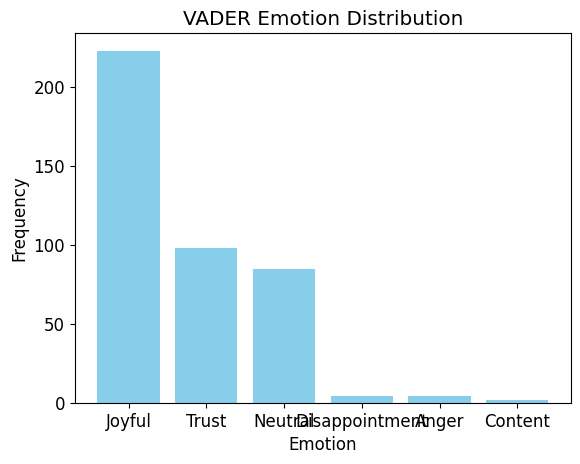

In [20]:
# Count the occurrences of each emotion
emotion_counts = df['VADER_emotion'].value_counts()

# Plot bar chart
plt.bar(emotion_counts.index, emotion_counts.values, color = 'skyblue')
plt.title("VADER Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.show()


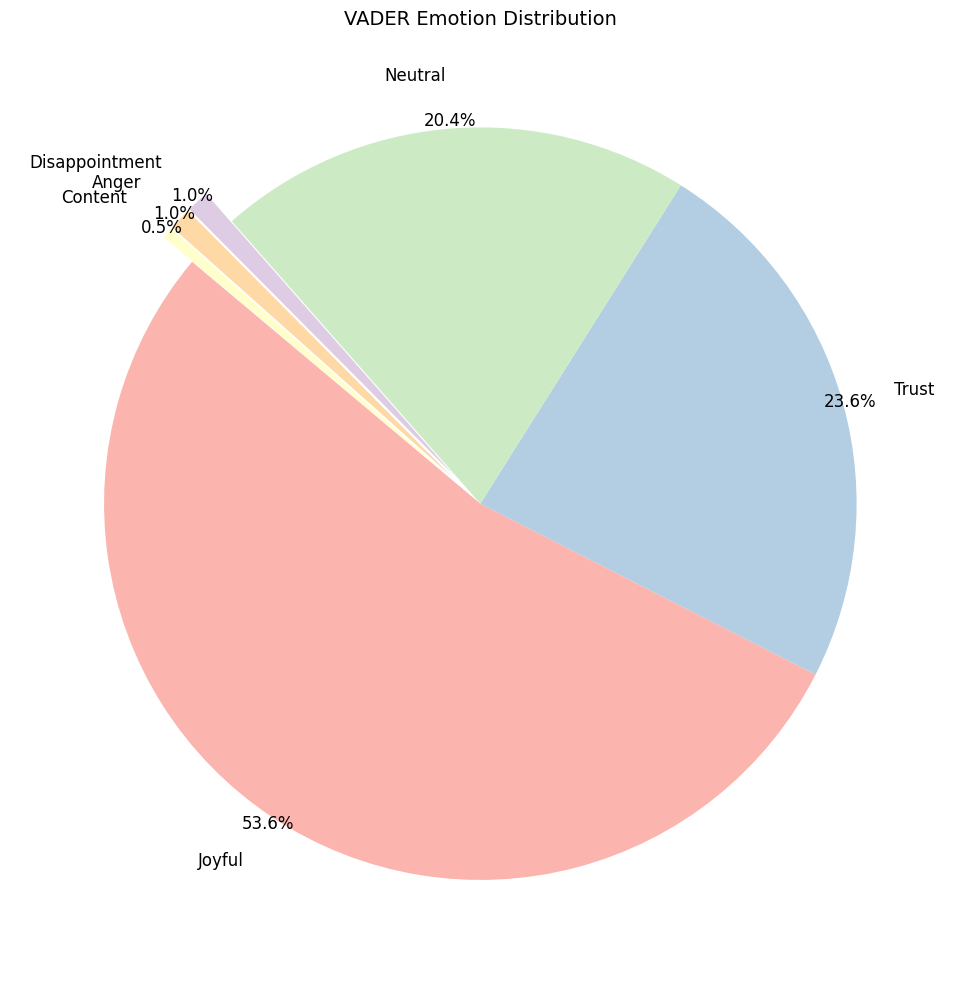

In [26]:

#  `emotion_counts` is a pandas Series
# Sort the data to rearrange the order
sorted_emotion_counts = emotion_counts.sort_values(ascending=False)

# Define explode values for small segments after sorting
explode = [0.1 if value / sum(sorted_emotion_counts.values) < 0.05 else 0 for value in sorted_emotion_counts.values]

# Plot the pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size for clarity
plt.pie(
    sorted_emotion_counts.values, 
    labels=sorted_emotion_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors = plt.cm.Pastel1.colors, 
    explode=explode, 
    labeldistance=1.14,  # Adjust distance of labels
    pctdistance=1.02    # Adjust distance of percentage labels
)


# Add a title
plt.title("VADER Emotion Distribution", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()






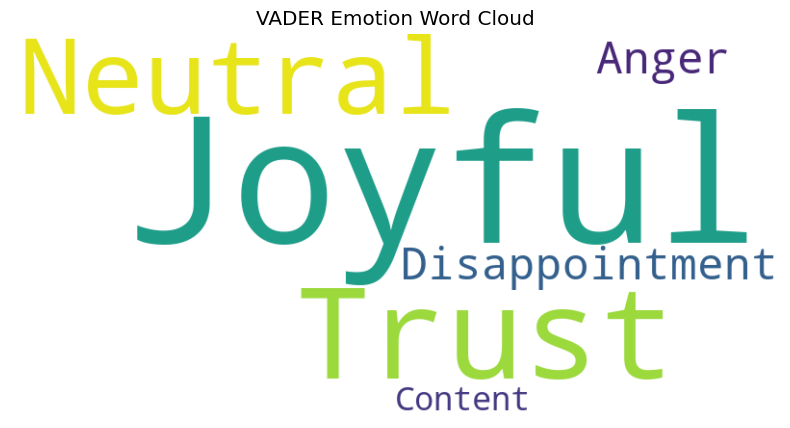

In [22]:
# Generate a word cloud for emotions
emotion_text = ' '.join(df['VADER_emotion'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emotion_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("VADER Emotion Word Cloud")
plt.show()
